In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
excel_file_path = 'ERA5_Weather_Data_Monash copy.xlsx'
weather_data = pd.read_excel(excel_file_path)
weather_data['datetime (UTC)'] = pd.to_datetime(weather_data['datetime (UTC)'])
weather_data.rename(columns={'datetime (UTC)': 'datetime'}, inplace=True)
weather_data

,datetime,"coordinates (lat,lon)",model (name),model elevation (surface),utc_offset (hrs),temperature (degC),dewpoint_temperature (degC),wind_speed (m/s),mean_sea_level_pressure (Pa),relative_humidity ((0-1)),surface_solar_radiation (W/m^2),surface_thermal_radiation (W/m^2),total_cloud_cover (0-1)
0,2010-01-01 00:00:00,"(-37.91, 145.13)",era5,69.59,10,18.26,16.39,2.60,101046.38,0.89,287.01,408.35,1.00
1,2010-01-01 01:00:00,"(-37.91, 145.13)",era5,69.59,10,18.67,16.29,2.91,101037.96,0.86,360.79,411.02,1.00
2,2010-01-01 02:00:00,"(-37.91, 145.13)",era5,69.59,10,18.16,15.89,3.26,101017.26,0.87,291.54,410.67,1.00
3,2010-01-01 03:00:00,"(-37.91, 145.13)",era5,69.59,10,18.46,15.33,3.17,101022.56,0.82,357.11,410.95,1.00
4,2010-01-01 04:00:00,"(-37.91, 145.13)",era5,69.59,10,18.53,15.11,2.95,100940.03,0.80,459.91,410.00,0.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100052,2021-05-31 20:00:00,"(-37.91, 145.13)",era5,69.59,10,8.31,3.28,4.91,102033.73,0.71,0.00,278.11,0.93
100053,2021-05-31 21:00:00,"(-37.91, 145.13)",era5,69.59,10,8.15,3.16,4.63,102033.49,0.71,0.00,277.98,1.00
100054,2021-05-31 22:00:00,"(-37.91, 145.13)",era5,69.59,10,8.72,3.31,5.29,102069.84,0.69,8.99,281.65,1.00
100055,2021-05-31 23:00:00,"(-37.91, 145.13)",era5,69.59,10,9.83,3.88,5.60,102077.12,0.66,80.46,296.20,1.00


In [5]:
solar_data = pd.read_csv('building_solar_values.csv')
solar_data = solar_data.iloc[:, 1:]
solar_data['Date'] = pd.to_datetime(solar_data['Date'])
solar_data.rename(columns={'Date': 'datetime'}, inplace=True)
solar_data

,datetime,Building0,Building1,Building3,Building4,Building5,Building6,Solar0,Solar1,Solar2,Solar3,Solar4,Solar5
0,2016-07-04 07:30:00,283.8,NaN,581.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-07-04 07:45:00,283.8,NaN,581.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-07-04 08:00:00,283.8,NaN,581.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-07-04 08:15:00,606.0,NaN,624.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-07-04 08:30:00,606.0,NaN,624.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
151781,2020-11-01 08:45:00,105.0,8.4,322.0,1.0,NaN,26.4,18.53,4.96,4.73,4.31,2.84,13.47
151782,2020-11-01 09:00:00,105.0,11.3,322.0,NaN,NaN,26.6,22.23,5.88,5.64,5.08,3.40,15.93
151783,2020-11-01 09:15:00,77.6,2.3,327.0,NaN,NaN,26.6,23.39,6.31,5.99,5.45,3.62,17.11
151784,2020-11-01 09:30:00,77.6,5.1,327.0,1.0,NaN,27.4,24.56,6.73,6.35,5.83,3.85,18.29


In [6]:
merged_df = pd.merge(solar_data, weather_data, on='datetime', how='inner')
merged_df = merged_df.drop(columns=['Building0','Building1','Building3','Building4','Building5','Building6'])
merged_df

,datetime,Solar0,Solar1,Solar2,Solar3,Solar4,Solar5,"coordinates (lat,lon)",model (name),model elevation (surface),utc_offset (hrs),temperature (degC),dewpoint_temperature (degC),wind_speed (m/s),mean_sea_level_pressure (Pa),relative_humidity ((0-1)),surface_solar_radiation (W/m^2),surface_thermal_radiation (W/m^2),total_cloud_cover (0-1)
0,2016-07-04 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,"(-37.91, 145.13)",era5,69.59,10,10.44,5.96,4.38,101452.72,0.74,0.24,321.90,1.00
1,2016-07-04 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,"(-37.91, 145.13)",era5,69.59,10,10.37,5.80,3.91,101453.10,0.73,0.00,318.73,1.00
2,2016-07-04 10:00:00,NaN,NaN,NaN,NaN,NaN,NaN,"(-37.91, 145.13)",era5,69.59,10,9.90,5.76,2.92,101491.57,0.75,0.00,314.92,1.00
3,2016-07-04 11:00:00,NaN,NaN,NaN,NaN,NaN,NaN,"(-37.91, 145.13)",era5,69.59,10,9.63,5.67,2.71,101496.36,0.76,0.00,314.92,1.00
4,2016-07-04 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,"(-37.91, 145.13)",era5,69.59,10,9.20,5.71,2.34,101527.11,0.79,0.00,313.03,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37941,2020-11-01 05:00:00,0.01,0.01,0.00,0.00,0.00,0.01,"(-37.91, 145.13)",era5,69.59,10,17.45,10.68,4.16,102265.72,0.64,817.34,299.80,0.24
37942,2020-11-01 06:00:00,1.45,0.42,0.39,0.35,0.23,1.16,"(-37.91, 145.13)",era5,69.59,10,17.32,10.93,4.42,102267.16,0.66,649.04,299.59,0.11
37943,2020-11-01 07:00:00,4.69,1.27,1.20,1.11,0.70,3.49,"(-37.91, 145.13)",era5,69.59,10,16.66,10.92,4.70,102319.80,0.69,447.33,296.78,0.00
37944,2020-11-01 08:00:00,8.73,2.35,2.24,2.09,1.32,6.53,"(-37.91, 145.13)",era5,69.59,10,15.45,10.68,4.50,102359.66,0.73,228.36,294.43,0.00


In [7]:
Solar0 = merged_df.drop(columns=['Solar1','Solar2','Solar3','Solar4','Solar5'])
Solar0

,datetime,Solar0,"coordinates (lat,lon)",model (name),model elevation (surface),utc_offset (hrs),temperature (degC),dewpoint_temperature (degC),wind_speed (m/s),mean_sea_level_pressure (Pa),relative_humidity ((0-1)),surface_solar_radiation (W/m^2),surface_thermal_radiation (W/m^2),total_cloud_cover (0-1)
0,2016-07-04 08:00:00,NaN,"(-37.91, 145.13)",era5,69.59,10,10.44,5.96,4.38,101452.72,0.74,0.24,321.90,1.00
1,2016-07-04 09:00:00,NaN,"(-37.91, 145.13)",era5,69.59,10,10.37,5.80,3.91,101453.10,0.73,0.00,318.73,1.00
2,2016-07-04 10:00:00,NaN,"(-37.91, 145.13)",era5,69.59,10,9.90,5.76,2.92,101491.57,0.75,0.00,314.92,1.00
3,2016-07-04 11:00:00,NaN,"(-37.91, 145.13)",era5,69.59,10,9.63,5.67,2.71,101496.36,0.76,0.00,314.92,1.00
4,2016-07-04 12:00:00,NaN,"(-37.91, 145.13)",era5,69.59,10,9.20,5.71,2.34,101527.11,0.79,0.00,313.03,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37941,2020-11-01 05:00:00,0.01,"(-37.91, 145.13)",era5,69.59,10,17.45,10.68,4.16,102265.72,0.64,817.34,299.80,0.24
37942,2020-11-01 06:00:00,1.45,"(-37.91, 145.13)",era5,69.59,10,17.32,10.93,4.42,102267.16,0.66,649.04,299.59,0.11
37943,2020-11-01 07:00:00,4.69,"(-37.91, 145.13)",era5,69.59,10,16.66,10.92,4.70,102319.80,0.69,447.33,296.78,0.00
37944,2020-11-01 08:00:00,8.73,"(-37.91, 145.13)",era5,69.59,10,15.45,10.68,4.50,102359.66,0.73,228.36,294.43,0.00


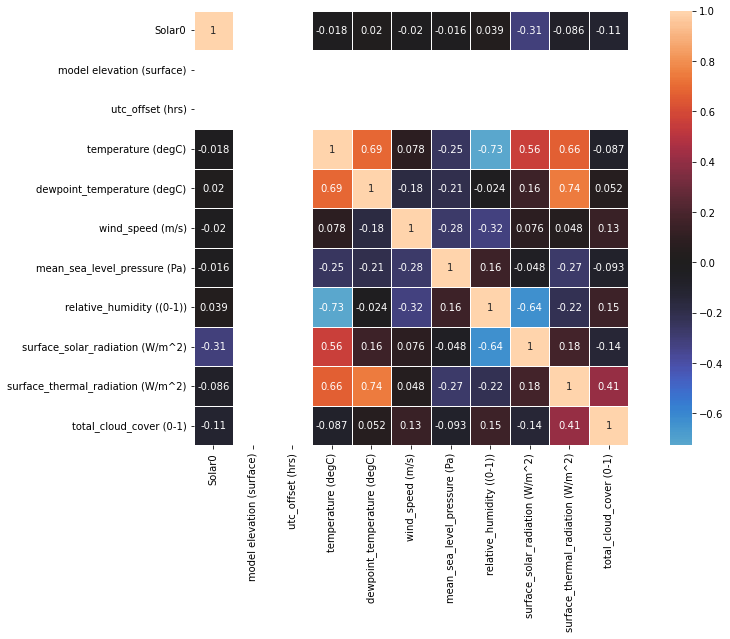

In [8]:
corrs = Solar0.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(corrs, annot=True, center=0, square=True, linewidths=.5)
plt.show()

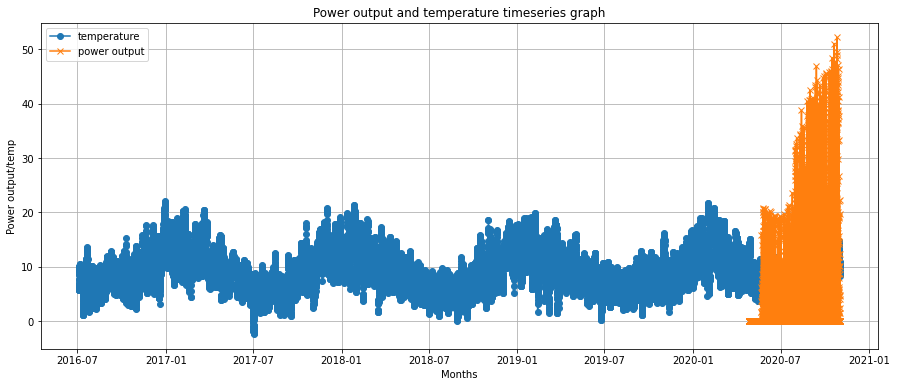

In [9]:
plt.figure(figsize=(15, 6))
plt.plot(Solar0['datetime'], Solar0['dewpoint_temperature (degC)'], label='temperature', marker='o')
plt.plot(Solar0['datetime'], Solar0['Solar0'], label='power output', marker='x')

plt.xlabel('Months')
plt.ylabel('Power output/temp')  # Set the y-axis label
plt.title('Power output and temperature timeseries graph')  # Set the title
plt.legend()
plt.grid(True)
plt.show()

# Temperature vs Power output relationship graph

In [10]:
Solar0_15days = Solar0[(Solar0['datetime'] >= '2020-06-01') & (Solar0['datetime'] <= '2020-06-15')]

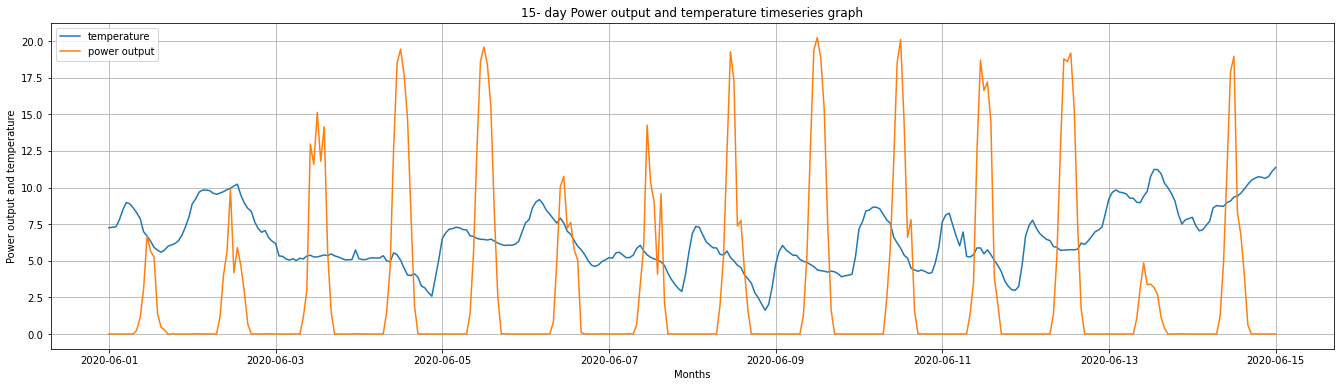

In [11]:
plt.figure(figsize=(23, 6))
plt.plot(Solar0_15days['datetime'], Solar0_15days['dewpoint_temperature (degC)'], label='temperature')
plt.plot(Solar0_15days['datetime'], Solar0_15days['Solar0'], label='power output')

plt.xlabel('Months')
plt.ylabel('Power output and temperature')
plt.title('15- day Power output and temperature timeseries graph')
plt.legend()
plt.grid(True)
plt.show()